# STA130F24 HW3
<br>

# Prelecture Homework
## Question 1

### Link to the ChatGPT interaction chat log: <br>https://chatgpt.com/share/66f57766-4e68-8013-8376-aabcca10eeb7
#### <u>Summary of ChatGPT Interaction:</u>
"Summary of Our Interaction
1. You provided a Python code snippet that creates histograms for penguin flipper lengths using the Plotly library.
2. You encountered a `SyntaxError` due to an unterminated string literal in the code.
3. I assisted you by identifying the error and explaining the code step by step, including its imports, data handling, statistical calculations, histogram creation, and visualization process.
4. Finally, we summarized the functionality of the code and how it processes the penguin dataset to produce visual insights."

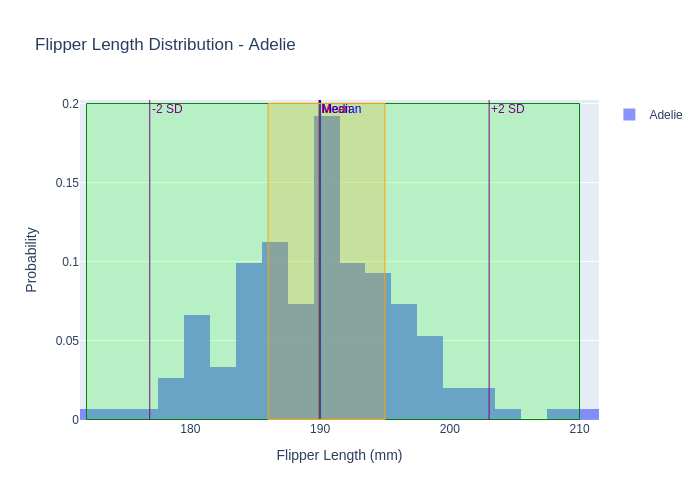

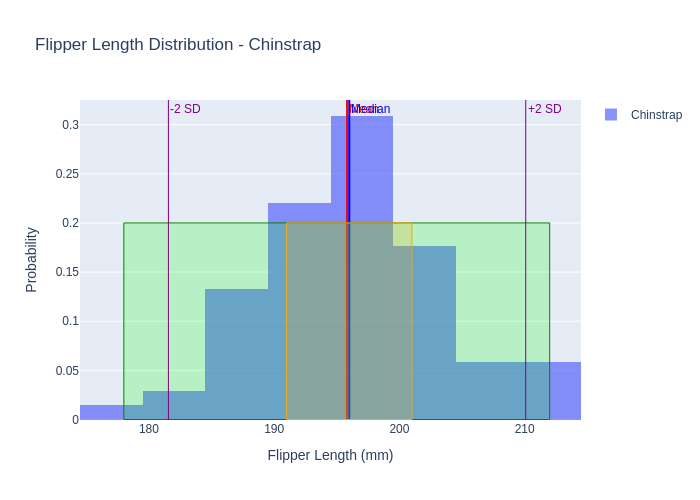

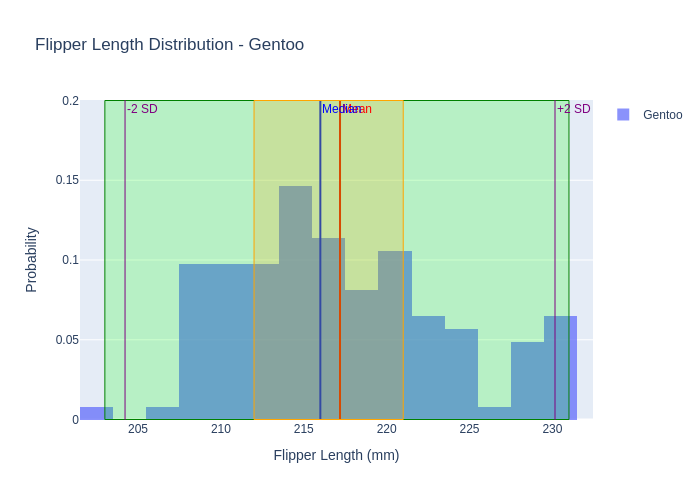

In [10]:
# Question 1 Code

import pandas as pd
import plotly.graph_objects as go
import numpy as np

# Load the penguins dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)

# Drop rows with missing values in flipper_length_mm
penguins = penguins.dropna(subset=['flipper_length_mm'])

# Define a function to create the histogram with annotations
def create_histogram(species_data, species_name):
    # Calculate statistics
    mean = species_data['flipper_length_mm'].mean()
    median = species_data['flipper_length_mm'].median()
    range_min, range_max = species_data['flipper_length_mm'].min(), species_data['flipper_length_mm'].max()
    q1 = species_data['flipper_length_mm'].quantile(0.25)
    q3 = species_data['flipper_length_mm'].quantile(0.75)
    iqr = q3 - q1
    std_dev = species_data['flipper_length_mm'].std()
    lower_bound = mean - 2 * std_dev
    upper_bound = mean + 2 * std_dev

    # Create a histogram
    fig = go.Figure()
    fig.add_trace(go.Histogram(x=species_data['flipper_length_mm'], 
                                 histnorm='probability', 
                                 name=species_name,
                                 opacity=0.75))

    # Add mean and median lines
    fig.add_vline(x=mean, line_color='red', line_width=2, 
                  annotation_text="Mean", annotation_position="top right", 
                  annotation=dict(font=dict(color="red")))
    fig.add_vline(x=median, line_color='blue', line_width=2, 
                  annotation_text="Median", annotation_position="top right", 
                  annotation=dict(font=dict(color="blue")))

    # Add range and IQR
    fig.add_shape(type='rect', 
                  x0=range_min, x1=range_max, 
                  y0=0, y1=0.2, 
                  line=dict(color='green', width=1), 
                  fillcolor='rgba(0, 255, 0, 0.2)',
                  name='Range')

    fig.add_shape(type='rect', 
                  x0=q1, x1=q3, 
                  y0=0, y1=0.2, 
                  line=dict(color='orange', width=1), 
                  fillcolor='rgba(255, 165, 0, 0.2)', 
                  name='IQR')

    # Add standard deviation bounds
    fig.add_vline(x=lower_bound, line_color='purple', line_width=1, 
                  annotation_text="-2 SD", annotation_position="top right", 
                  annotation=dict(font=dict(color="purple")))
    fig.add_vline(x=upper_bound, line_color='purple', line_width=1, 
                  annotation_text="+2 SD", annotation_position="top right", 
                  annotation=dict(font=dict(color="purple")))

    # Update layout
    fig.update_layout(title=f'Flipper Length Distribution - {species_name}',
                      xaxis_title='Flipper Length (mm)',
                      yaxis_title='Probability',
                      showlegend=True)
    
    # Show the figure
    fig.show(renderer = 'png')

# Create histograms for each species
for species in penguins['species'].unique():
    species_data = penguins[penguins['species'] == species]
    create_histogram(species_data, species)


## Question 2

### Link to the ChatGPT interaction chat log: <br>https://chatgpt.com/share/66f57cef-34a0-8013-b9dd-578edfc1c8e9
#### <u>Summary of ChatGPT Interaction:</u>
"Here's a summary of our interaction:

1. **Error Handling**: You presented a `NameError` related to the `make_subplots` function, which indicated it was not defined. I suggested importing it from the `plotly.subplots` module to resolve the issue.

2. **Figure Overlap**: You asked for help fixing an overlap issue with the "mean" and "median" labels in the figure. I provided a method to adjust the annotation positions to ensure they don’t overlap.

3. **Code Explanation**: You requested a detailed explanation of a code snippet that analyzes the flipper length distribution of penguins using the Pandas and Plotly libraries. I provided a step-by-step breakdown of the code, covering data loading, preprocessing, statistical calculations, histogram creation, and visualization."

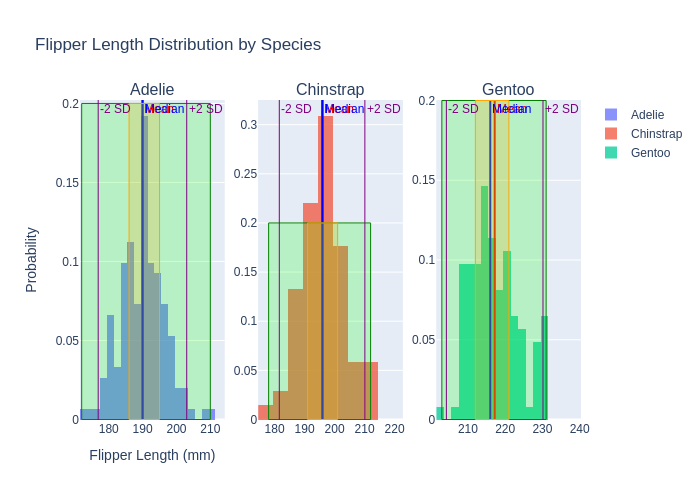

In [20]:
# Question 2 Code

import pandas as pd
import plotly.graph_objects as go
import numpy as np

# Load the penguins dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)

# Drop rows with missing values in flipper_length_mm
penguins = penguins.dropna(subset=['flipper_length_mm'])

# Define a function to calculate statistics
def calculate_statistics(data):
    mean = data['flipper_length_mm'].mean()
    median = data['flipper_length_mm'].median()
    range_min, range_max = data['flipper_length_mm'].min(), data['flipper_length_mm'].max()
    q1 = data['flipper_length_mm'].quantile(0.25)
    q3 = data['flipper_length_mm'].quantile(0.75)
    std_dev = data['flipper_length_mm'].std()
    return mean, median, range_min, range_max, q1, q3, std_dev

# Create a single figure with subplots
fig = make_subplots(rows=1, cols=3, subplot_titles=penguins['species'].unique())

# Create histograms for each species
for i, species in enumerate(penguins['species'].unique()):
    species_data = penguins[penguins['species'] == species]
    mean, median, range_min, range_max, q1, q3, std_dev = calculate_statistics(species_data)
    
    # Calculate SD bounds
    lower_bound = mean - 2 * std_dev
    upper_bound = mean + 2 * std_dev
    
    # Create a histogram for the species
    fig.add_trace(go.Histogram(x=species_data['flipper_length_mm'], 
                                 histnorm='probability', 
                                 name=species,
                                 opacity=0.75), row=1, col=i+1)

    # Add mean and median lines
    fig.add_vline(x=mean, line_color='red', line_width=2, 
                  annotation_text="Mean", annotation_position="top right", 
                  annotation=dict(font=dict(color="red")), row=1, col=i+1)
    fig.add_vline(x=median, line_color='blue', line_width=2, 
                  annotation_text="Median", annotation_position="top right", 
                  annotation=dict(font=dict(color="blue")), row=1, col=i+1)

    # Add range and IQR
    fig.add_shape(type='rect', 
                  x0=range_min, x1=range_max, 
                  y0=0, y1=0.2, 
                  line=dict(color='green', width=1), 
                  fillcolor='rgba(0, 255, 0, 0.2)',
                  row=1, col=i+1)
    fig.add_shape(type='rect', 
                  x0=q1, x1=q3, 
                  y0=0, y1=0.2, 
                  line=dict(color='orange', width=1), 
                  fillcolor='rgba(255, 165, 0, 0.2)', 
                  row=1, col=i+1)

    # Add standard deviation bounds
    fig.add_vline(x=lower_bound, line_color='purple', line_width=1, 
                  annotation_text="-2 SD", annotation_position="top right", 
                  annotation=dict(font=dict(color="purple")), row=1, col=i+1)
    fig.add_vline(x=upper_bound, line_color='purple', line_width=1, 
                  annotation_text="+2 SD", annotation_position="top right", 
                  annotation=dict(font=dict(color="purple")), row=1, col=i+1)

# Update layout for the entire figure
fig.update_layout(title='Flipper Length Distribution by Species',
                  xaxis_title='Flipper Length (mm)',
                  yaxis_title='Probability',
                  showlegend=True)

# Show the figure
fig.show(renderer='png')


## Question 3

### Link to the ChatGPT interaction chat log: <br>https://chatgpt.com/share/66f5a162-46a4-8013-bfc4-8e59ee0307bd
#### <u>Summary of ChatGPT Interaction:</u>
"In our interaction, we discussed the visualization methods of box plots, histograms, and kernel density estimators (KDEs). You provided a description of each, noting their usefulness in conveying data characteristics like mean, median, and interquartile range, as well as their limitations regarding sample frequency and distribution details. 

I expanded on your points by outlining the pros and cons of each method:
- **Box Plot:** Concise, robust, and useful for comparisons but limited in detail and sensitive to data loss.
- **Histogram:** Clearly shows frequency and distribution shape, but can be sensitive to bin size and data aggregation.
- **KDE:** Provides a smooth representation of data distribution, but is affected by bandwidth selection and can be harder to interpret.

I also emphasized the importance of context and audience in choosing the appropriate visualization method. Combining these methods can enhance understanding of the data."

<br><br>
My preference on which data visualization method to use depends on the data which I am studying. For instance, if my data is continuous, the KDE will be preferred as it highlights important information such as modality, shape of data and distribution. It also reflects population using an estimation with data from the limited sample size. On the other hand, if I am working with categorical data, the box plot will be useful for providing an overview on the central tendancy and variability. However, the box plot does not show the sample size, hence the the information represented can be misleading. On the contrary, the histogram is a good data visualization method which provides information on the sample size.

## Question 4

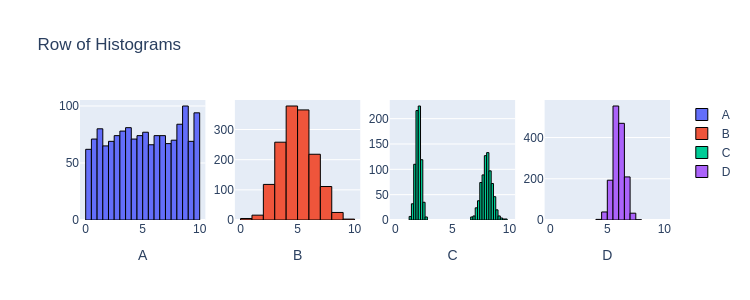

In [9]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show(renderer = 'png') # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

From observing the figures, it is noticed that there is a high variance in Figure A, with the data evenly spread, hence the estimated mean is 5. Figure B is unimodal and symmetrical with its mode occuring at the values 5-6. There is a small variance, therefore the estimated mean is 5. On the other hand, Figure C is bimodal, with its main mode occuring at values 1-3 and the other mode at 6-8. The variance in the first mode is very small while it is higher in the second mode. Hence it is estimated that mean will be 5. Figure D is unimodal and symmetrical, and it has a small variance with the mode occuring at values 5-6, hence the estimated mean is 5.5.
<br><br>
To answer the questions, dataset A, B and C will have similar means. Additionally, datasets A and C will have similar variances that are high, while datasets B and D will have similar variances that are low.
<br><br>
The datasets A and C will have similar means and variances.<br>
The datasets B and C will have similar means but different variances.<br>
The datasets B and D will have similar variances but different means.<br>
The datasets A and D will have different means and variances.
<br><br><br><br><br>
*(I have asked ChatGPT to generate a code to summarise the statistics for the figures below to double-check)*


### Link to the ChatGPT interaction chat log: <br>https://chatgpt.com/share/66f5a162-46a4-8013-bfc4-8e59ee0307bd
#### <u>Summary of ChatGPT Interaction:</u>
"In this interaction, you provided a Python code that generates histograms for four datasets using random variables from different distributions. You then requested an additional piece of code to compute and display statistics about the central tendency and variability of these datasets.

I provided a Python function that calculates key statistical measures: mean, median, variance, and standard deviation for each dataset. Additionally, I explained each step of the code, covering data generation, statistical computation, and output formatting.

This enhances your understanding of the datasets by providing insights into their distribution properties."

In [7]:
# Code that prints the statistics

from scipy import stats
import numpy as np

# Define the number of samples
n = 1500

# Generate the data
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

# Function to calculate central tendency and variability
def calculate_statistics(data, label):
    mean = np.mean(data)
    median = np.median(data)
    variance = np.var(data)
    std_dev = np.std(data)
    
    print(f"Statistics for {label}:")
    print(f"Mean: {mean:.2f}")
    print(f"Median: {median:.2f}")
    print(f"Variance: {variance:.2f}")
    print(f"Standard Deviation: {std_dev:.2f}")
    print("\n")

# Calculate and print statistics for each dataset
calculate_statistics(data1, "A (Uniform Distribution)")
calculate_statistics(data2, "B (Normal Distribution, μ=5, σ=1.5)")
calculate_statistics(data3, "C (Mixture of Normals)")
calculate_statistics(data4, "D (Normal Distribution, μ=6, σ=0.5)")


Statistics for A (Uniform Distribution):
Mean: 5.07
Median: 5.00
Variance: 8.31
Standard Deviation: 2.88


Statistics for B (Normal Distribution, μ=5, σ=1.5):
Mean: 5.05
Median: 5.07
Variance: 2.35
Standard Deviation: 1.53


Statistics for C (Mixture of Normals):
Mean: 5.01
Median: 4.70
Variance: 9.19
Standard Deviation: 3.03


Statistics for D (Normal Distribution, μ=6, σ=0.5):
Mean: 6.01
Median: 6.01
Variance: 0.24
Standard Deviation: 0.49




# Postlecture Homework
## Question 6

### Link to the ChatGPT interaction chat log: <br>https://chatgpt.com/share/66f5c27d-7588-8013-a4e3-969fcdb4cf9f
#### <u>Summary of ChatGPT Interaction:</u>
"Interaction Summary:

- You provided a URL to the **Iris dataset**, a classic dataset in machine learning that includes measurements like **sepal length**, **sepal width**, **petal length**, and **petal width** for three species of flowers: **Setosa**, **Versicolor**, and **Virginica**.
  
- We discussed different visualization techniques suitable for this dataset, including **KDE (Kernel Density Estimation) plots** and **box plots**, and concluded that these would be appropriate to explore the distribution and summary statistics of sepal length across species.

- I provided a Python code that:
  - Loads the dataset from the URL using **pandas**.
  - Creates **KDE** and **box plots** using **Seaborn** to visualize the distribution of sepal length.
  - Outputs the **descriptive statistics** (mean, median, standard deviation, etc.) for each feature in the dataset.

- I explained the Python code step-by-step, detailing how each part works: from importing libraries, loading the data, plotting the graphs, to calculating summary statistics.

- Based on the visualizations and statistics, I highlighted some key observations from the dataset:
  - **Setosa** has significantly smaller sepal lengths compared to the other two species, making it easier to distinguish.
  - **Versicolor** and **Virginica** have more overlap in their sepal lengths, suggesting that additional features might be needed to differentiate them effectively.
  - Descriptive statistics show that **Virginica** has the largest and most variable sepal lengths, while **Setosa** has the smallest and least variable lengths.

This interaction focused on exploring and analyzing the sepal length feature of the Iris dataset using visualization and summary statistics."

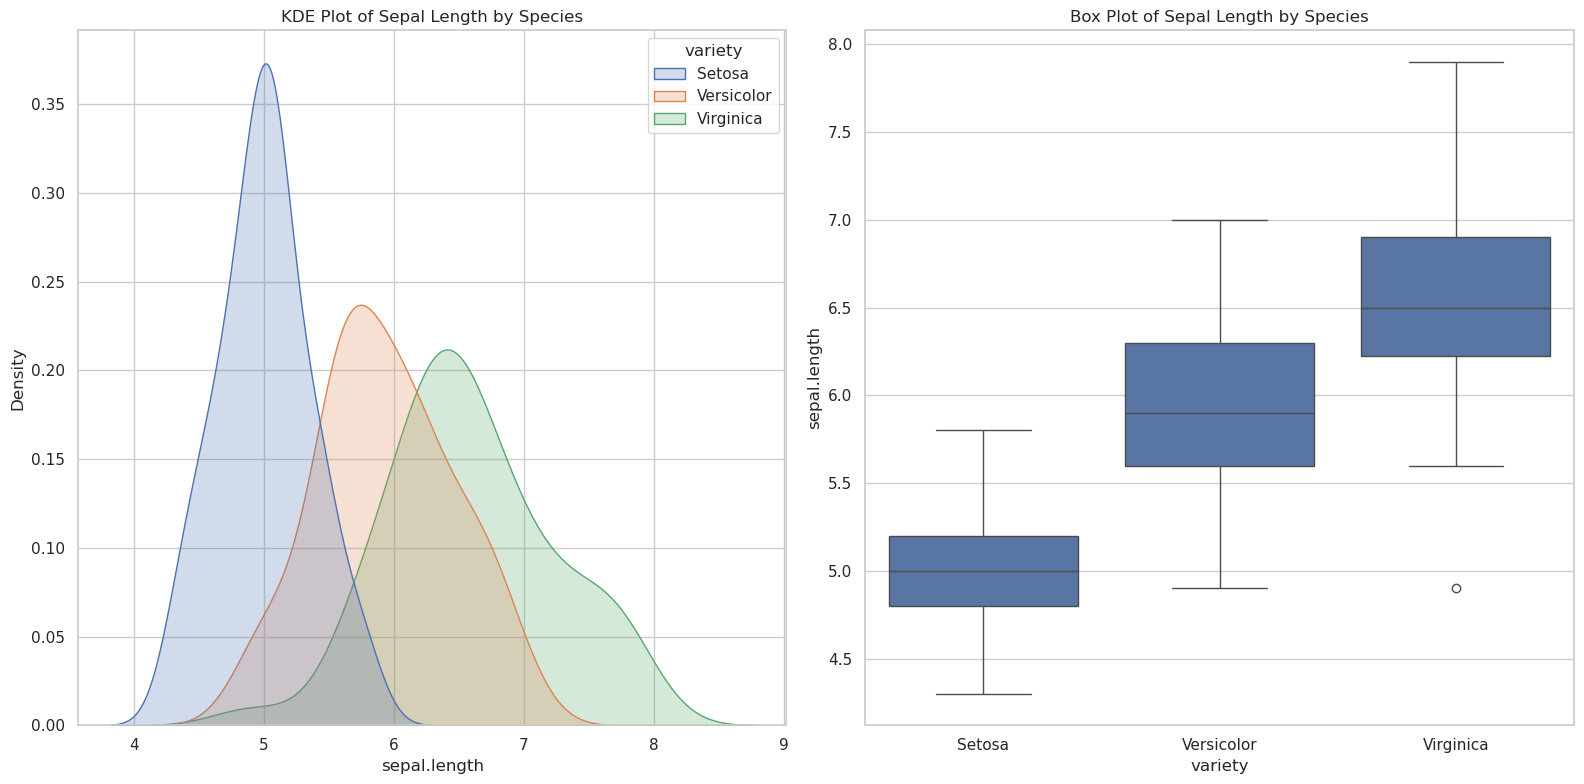

       sepal.length  sepal.width  petal.length  petal.width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
url = "https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"
iris_df = pd.read_csv(url)

# Set up the figure for KDE and Box plots
plt.figure(figsize=(16, 8))

# KDE for sepal length, with variety as the hue
plt.subplot(1, 2, 1)
sns.kdeplot(data=iris_df, x='sepal.length', hue='variety', fill=True)
plt.title("KDE Plot of Sepal Length by Species")

# Box plot for sepal length grouped by species
plt.subplot(1, 2, 2)
sns.boxplot(x='variety', y='sepal.length', data=iris_df)
plt.title("Box Plot of Sepal Length by Species")

plt.tight_layout()
plt.show()

# Output basic statistics of the data
print(iris_df.describe())
